## ARIMA and SARIMA

In [39]:
## libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
import pickle

In [3]:
## loading  the  data

df = pd.read_csv(r'data\fairy_lights.csv')
df.head()

,week_start_date,fairy_light_sales
0,2021-01-04,150
1,2021-01-11,145
2,2021-01-18,140
3,2021-01-25,135
4,2021-02-01,130


In [6]:
type(df['week_start_date'][0])

str

In [11]:
## working on a copy of the data

data = pd.DataFrame()
data['week'] = pd.to_datetime(df['week_start_date'])
data['sales'] = df['fairy_light_sales']
data.head()

,week,sales
0,2021-01-04,150
1,2021-01-11,145
2,2021-01-18,140
3,2021-01-25,135
4,2021-02-01,130


In [12]:
type(data['week'][0])

pandas._libs.tslibs.timestamps.Timestamp

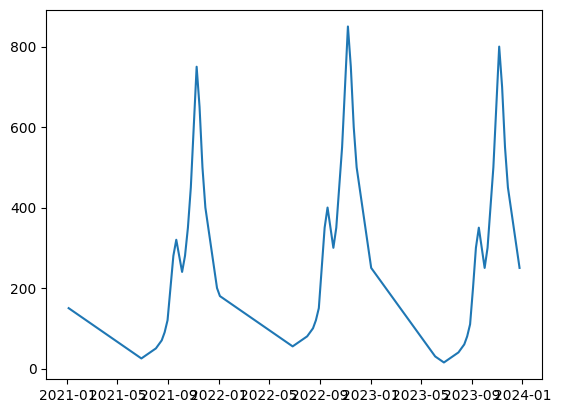

In [15]:
plt.plot(data['week'], data['sales'])

In [25]:
test_result = adfuller(data['sales'])
if test_result[1] <= 0.05:
    print('Reject the null hypothesis - data is stationary')
else:
    print('Accept the null hypothesis - data not stationary')

test_result[1]

Reject the null hypothesis - data is stationary


0.002649154568834617

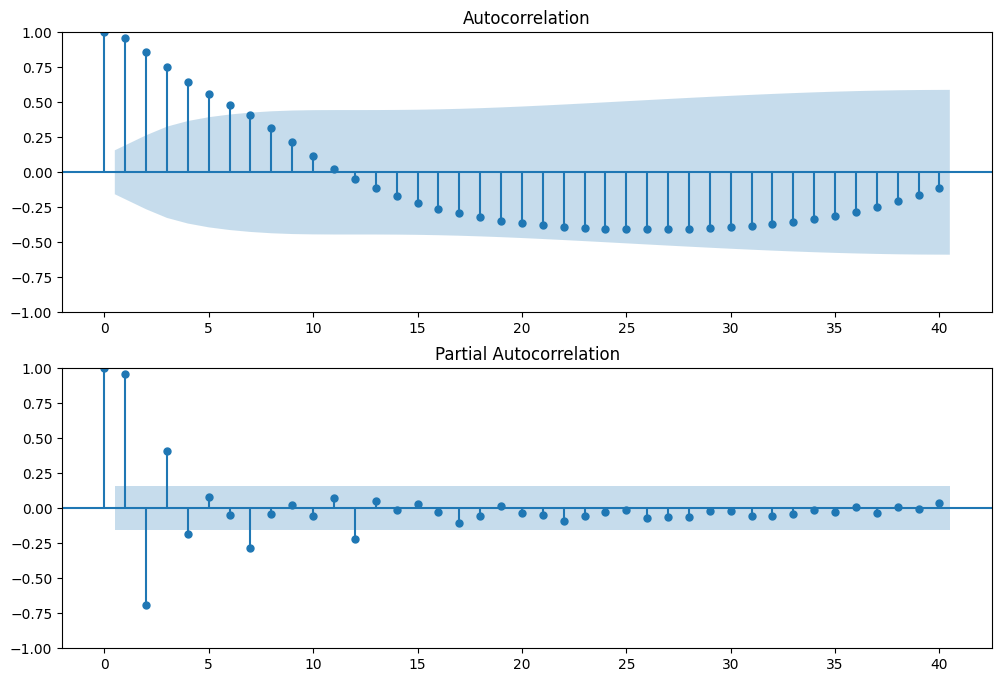

In [24]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(data['sales'], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(data['sales'], lags=40, ax=ax2)

From these two graphs:
1. Value for AR model (from PA) - p: 1
2. Value for MA model (from A) - q: 6/7
3. d = 0 (no shift as stationary)

In [38]:
## ARIMA p = 1, d = 0, q = 6

In [35]:
model = ARIMA(data['sales'], order=(1, 0, 2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  156
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -768.055
Date:                Sun, 11 Aug 2024   AIC                           1546.109
Time:                        12:36:24   BIC                           1561.358
Sample:                             0   HQIC                          1552.303
                                - 156                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.5877    128.369      1.586      0.113     -48.011     455.186
ar.L1          0.8751      0.041     21.415      0.000       0.795       0.955
ma.L1          1.1836      0.057     20.691      0.000       1.071       1.296
ma.L2          0.5907      0.071      8.347      0.000       0.452       0.729
sigma2      1072.0369     94.200     11.380      0.000     887.408    1256.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               345.40
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.55
Prob(H) (two-sided):                  0.67   Kurtosis:                        10.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
len(data['sales'])


156

<Axes: >

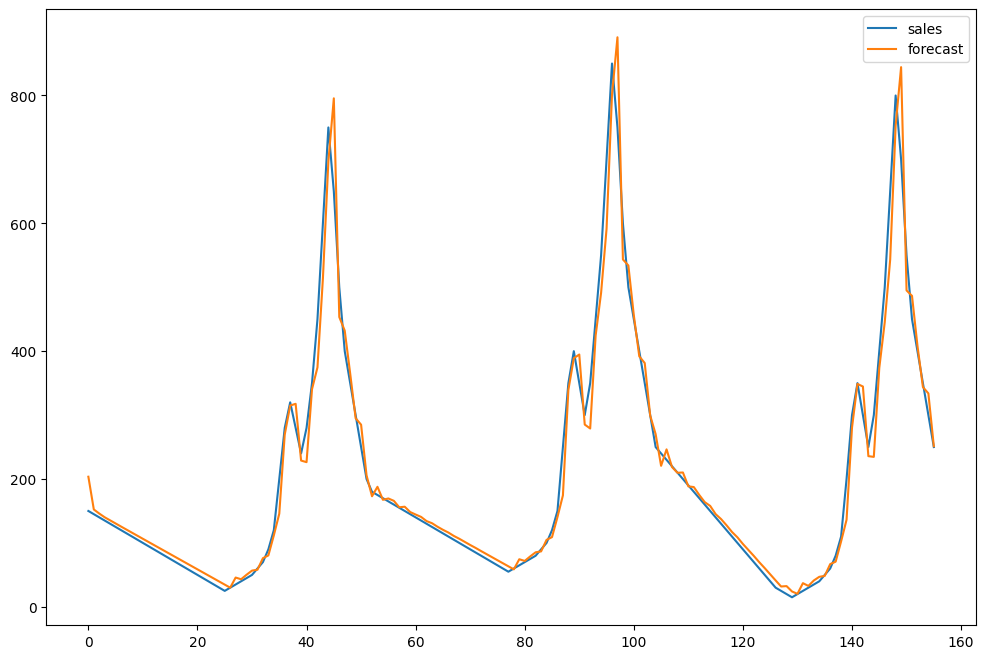

In [37]:
data['forecast'] = model_fit.predict(start=0, end=156)
data[['sales', 'forecast']].plot(figsize=(12, 8))

## SARIMAX

In [40]:
## SARIMAX p = 1, d = 0, q = 2, P = 1, D = 0, Q = 2, s = 52 (one year pattern)

model = sm.tsa.statespace.SARIMAX(data['sales'], order=(1, 0, 2), seasonal_order=(1, 0, 2, 52))
model_fit = model.fit()

c:\Users\Akhil PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Akhil PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

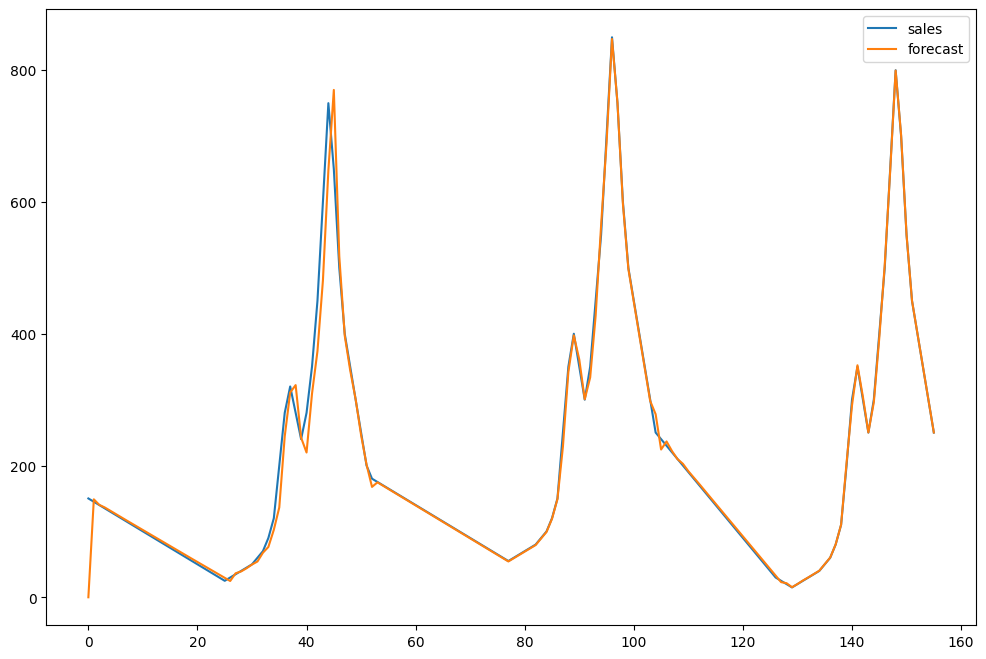

In [41]:
data['forecast'] = model_fit.predict(start=0, end=156)
data[['sales', 'forecast']].plot(figsize=(12, 8))

SARIMAX - better but takes a LONGGGGGG time to train

In [55]:
pickle.dump(model_fit, open('model.pkl', 'wb'))

In [56]:
model = pickle.load(open('model.pkl', 'rb'))